# Variance of Gradients

In this notebook, we study the difference of computing the variance of the gradients
before and after the softmax layer, and how well the finite difference approximation
of the linear model works in practice.

In [4]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import clone
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

from mislabeled.detect.detectors import LinearVoSG, VoLG, VoSG

simplefilter("ignore", category=ConvergenceWarning)

X, y = make_blobs(
    n_samples=500, centers=2, n_features=2, cluster_std=2, shuffle=True, random_state=1
)

X = StandardScaler().fit_transform(X)

clf = SGDClassifier(
    loss="log_loss", learning_rate="constant", eta0=0.001, random_state=1, max_iter=100
)

volg = VoLG(clone(clf))
vosg = VoSG(clone(clf), n_directions=100, epsilon=0.01, random_state=1)
vosg_linear = LinearVoSG(clone(clf))
vosg_linear

LinearVoSG(base_model=SGDClassifier(eta0=0.001, learning_rate='constant',
                                    loss='log_loss', max_iter=100,
                                    random_state=1))

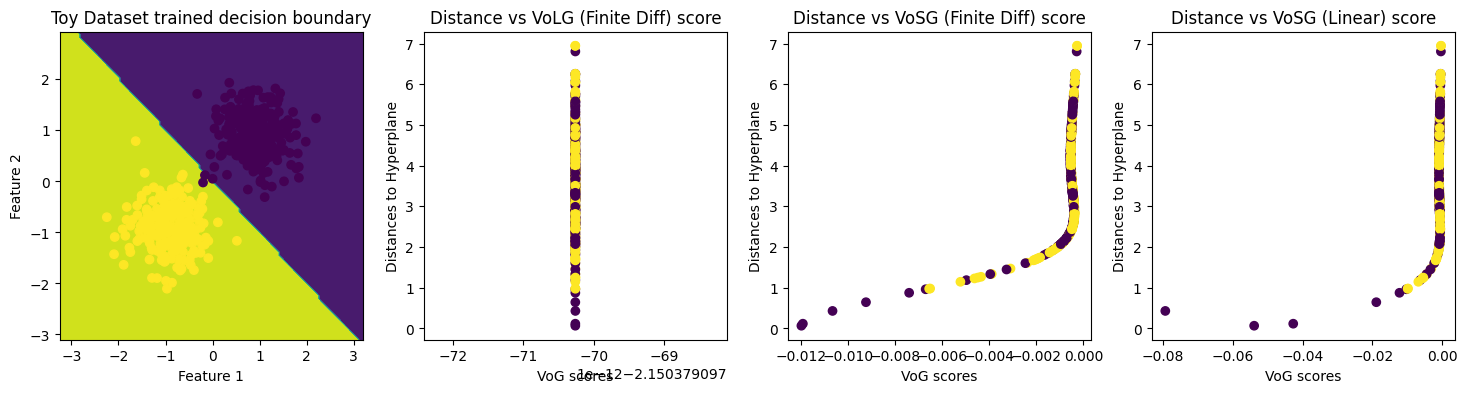

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4))

clf.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict", ax=ax[0]
)
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].set_title("Toy Dataset trained decision boundary")

p = clf.predict_proba(X)[:, 1]
dist_to_decision_boundary = np.abs(np.log((1 / (p + 1e-8)) - 1))

ax[1].scatter(volg.trust_score(X, y), dist_to_decision_boundary, c=y)
ax[1].set_xlabel("VoG scores")
ax[1].set_ylabel("Distances to Hyperplane")
ax[1].set_title("Distance vs VoLG (Finite Diff) score")

ax[2].scatter(vosg.trust_score(X, y), dist_to_decision_boundary, c=y)
ax[2].set_xlabel("VoG scores")
ax[2].set_ylabel("Distances to Hyperplane")
ax[2].set_title("Distance vs VoSG (Finite Diff) score")

ax[3].scatter(vosg_linear.trust_score(X, y), dist_to_decision_boundary, c=y)
ax[3].set_xlabel("VoG scores")
ax[3].set_ylabel("Distances to Hyperplane")
ax[3].set_title("Distance vs VoSG (Linear) score")
plt.show()